# Logistic Regression

Logistic regression

### Configure notebook

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Set fontsizes in figures
params = {'legend.fontsize': 'large',
          'axes.labelsize': 'large',
          'axes.titlesize': 'large',
          'xtick.labelsize': 'large',
          'ytick.labelsize': 'large',
          'legend.fontsize': 'large',
          'legend.handlelength': 2}
plt.rcParams.update(params)

In [2]:
# Import code from src
sys.path.insert(0, '../src/')
from setup import fig_path

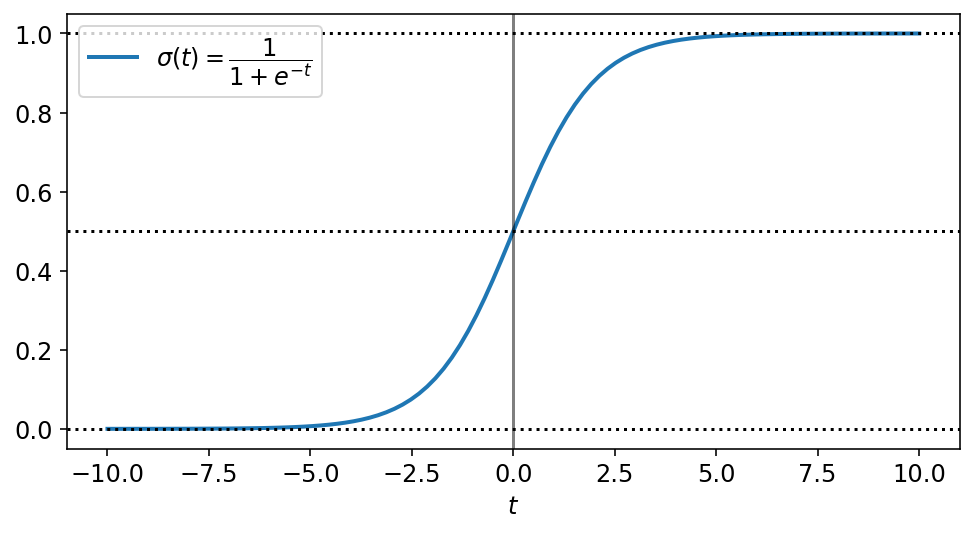

In [4]:
def logistic_function(t):
    return 1 / (1 + np.exp(-t))

t = np.linspace(-10, 10, 100)
fig = plt.figure(figsize=(8, 4))
plt.plot(t, logistic_function(t), lw=2)
plt.axhline(0, ls=':', color='k')
plt.axhline(0.5, ls=':', color='k')
plt.axhline(1, ls=':', color='k')
plt.axvline(0, ls='-', color='k', alpha=0.5)
plt.xlabel('$t$')
plt.legend(['$\\sigma(t)=\\dfrac{1}{1+e^{-t}}$'], loc='upper left')
fig.savefig(fig_path('logistic_function.pdf'))
plt.show()